In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)


#Load Dataset
df =pd.read_csv('C:/Users/sarve/OneDrive/Desktop/Logistick Regression Healthcare Project/noshowappointments.csv')



#Preprocessing
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['WaitTime'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})


# data cleaning drop irrelivant columns

df = df.drop(columns = ['PatientId','AppointmentID'])



# Remove negative wait times
df = df[df['WaitTime'] >= 0]

# Encode categorical variables
df = pd.get_dummies(df, columns=['Gender', 'Neighbourhood'], drop_first=True)

In [2]:
df.head()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
5,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,0,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,0,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
7,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,0,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
9,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
10,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [4]:
#Feature and Target
X= df.drop(columns =['No-show', 'ScheduledDay', 'AppointmentDay'])
y =  df['No-show']

In [7]:
# Train and Test Split data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)



In [12]:
#Feature scailing
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)














In [16]:
#Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled,y_train)





LogisticRegression(max_iter=1000)

In [17]:
#Predictions

y_pred = model.predict(X_test_scaled)

y_prob = model.predict_proba(X_test_scaled)[:,1]



In [21]:
## Evaluating model performance
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test,y_pred),4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob), 4))

Accuracy: 0.7148
Precision: 0.3488
Recall: 0.0037
F1 Score: 0.0073
ROC AUC: 0.5888


In [23]:
# Improving class imbalance with with class_weights
model =LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [24]:
#Threshold Tuning
threshold = 0.2  # example threshold, tune via validation
y_pred_custom = (y_prob >= threshold).astype(int)


print("Recall at threshold 0.2:", round(recall_score(y_test, y_pred_custom), 4))
print("Precision at threshold 0.2:", round(precision_score(y_test, y_pred_custom), 4))
print("F1 Score at threshold 0.2:", round(f1_score(y_test, y_pred_custom), 4))




Recall at threshold 0.2: 0.9276
Precision at threshold 0.2: 0.2946
F1 Score at threshold 0.2: 0.4472


In [25]:
## Over Sampling the minority class using SMOTE 
from imblearn.over_sampling import SMOTE

In [27]:
#using smote to resample the minority classes using synthetic resampling
sm =SMOTE(random_state=42)

#fit_resample function will perform synthetic resampling

X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)






In [29]:

### Training model again after performing the SMOTE
model =LogisticRegression(max_iter=1000)
model.fit(X_train_res,y_train_res)

LogisticRegression(max_iter=1000)

In [30]:
## model prediction 
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [33]:
## Evaluating Model predictions

print("Recall after SMOTE:", round(recall_score(y_test, y_pred), 4))
print("Precision after SMOTE:", round(precision_score(y_test, y_pred), 4))
print("F1 Score after SMOTE:", round(f1_score(y_test, y_pred), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob), 4))

Recall after SMOTE: 0.5691
Precision after SMOTE: 0.3421
F1 Score after SMOTE: 0.4273
ROC AUC: 0.5888


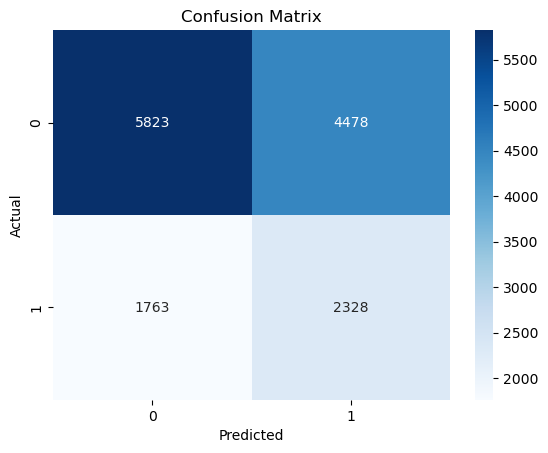

In [34]:
    ## Confision Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [36]:
# Cross Validation to measure how well model would perform on unseen data 
cv_scores = cross_val_score(model,X, y, cv=5, scoring='roc_auc')
print("Cross-validated ROC AUC scores:", np.round(cv_scores, 4))

Cross-validated ROC AUC scores: [0.5822 0.5789 0.5669 0.5611 0.5857]


In [37]:
print("Cross-validated ROC AUC scores:", np.round(cv_scores, 4))

Cross-validated ROC AUC scores: [0.5822 0.5789 0.5669 0.5611 0.5857]


In [38]:
print("Average CV ROC AUC:", round(np.mean(cv_scores), 4))


Average CV ROC AUC: 0.575


In [39]:
patient_results = X_test.copy()

In [40]:
patient_results["Predicted_Probability"] = y_prob

In [42]:
patient_results

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitTime,Gender_M,Neighbourhood_ANDORINHAS,...,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,Predicted_Probability
734,7,0,0,0,0,0,1,37,True,False,...,False,False,False,False,False,False,False,False,False,0.373971
79659,77,0,0,0,0,0,1,24,True,False,...,False,False,False,False,False,False,False,False,False,0.222441
60687,34,0,0,0,0,0,0,20,True,False,...,False,False,True,False,False,False,False,False,False,0.308312
10620,41,0,0,0,0,0,0,0,True,False,...,False,False,False,False,False,False,False,False,False,0.237088
41582,61,0,0,0,0,0,0,1,False,False,...,False,False,False,False,False,False,False,False,False,0.202655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38562,7,0,0,0,0,0,1,4,True,False,...,False,False,False,False,False,False,False,False,True,0.234865
27660,55,0,1,1,0,0,1,4,False,False,...,False,False,False,False,False,False,False,False,False,0.241045
46560,76,0,1,0,0,0,1,20,False,False,...,False,False,False,False,False,False,False,False,False,0.185208
93780,63,0,1,0,1,0,0,32,True,False,...,False,False,False,True,False,False,False,False,False,0.320937


In [43]:
y_preds = model.predict(X_test)  # 0 or 1
patient_results["Predicted_Label"] = y_preds

C:\Users\sarve\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [44]:
patient_results

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitTime,Gender_M,Neighbourhood_ANDORINHAS,...,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,Predicted_Probability,Predicted_Label
734,7,0,0,0,0,0,1,37,True,False,...,False,False,False,False,False,False,False,False,0.373971,1
79659,77,0,0,0,0,0,1,24,True,False,...,False,False,False,False,False,False,False,False,0.222441,0
60687,34,0,0,0,0,0,0,20,True,False,...,False,True,False,False,False,False,False,False,0.308312,0
10620,41,0,0,0,0,0,0,0,True,False,...,False,False,False,False,False,False,False,False,0.237088,0
41582,61,0,0,0,0,0,0,1,False,False,...,False,False,False,False,False,False,False,False,0.202655,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38562,7,0,0,0,0,0,1,4,True,False,...,False,False,False,False,False,False,False,True,0.234865,0
27660,55,0,1,1,0,0,1,4,False,False,...,False,False,False,False,False,False,False,False,0.241045,0
46560,76,0,1,0,0,0,1,20,False,False,...,False,False,False,False,False,False,False,False,0.185208,0
93780,63,0,1,0,1,0,0,32,True,False,...,False,False,True,False,False,False,False,False,0.320937,0
